In [1]:
import matplotlib.pyplot as plt

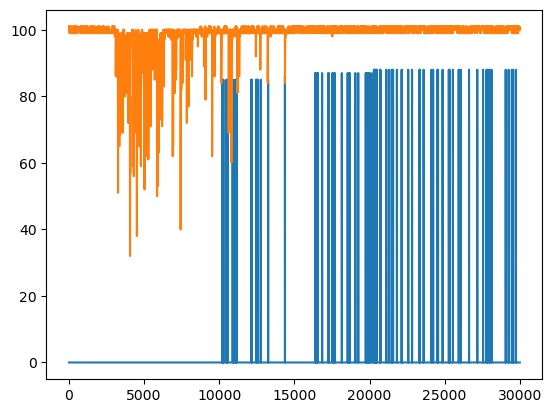

In [8]:

f = open('data/retrace.csv')
tokens = [e.split(",") for e in f.readlines()]
x = [int(e[0]) for e in tokens]
y = [int(e[1]) for e in tokens]
handle = plt.plot(x,y)

f = open('data/trace.csv')
tokens = [e.split(",") for e in f.readlines()]
x = [int(e[0]) for e in tokens]
y = [int(e[1]) for e in tokens]
handle = plt.plot(x,y)

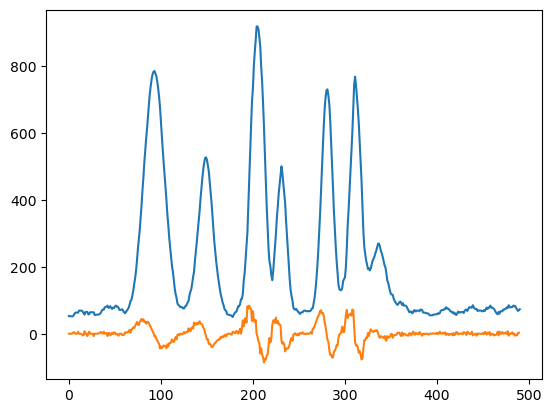

In [16]:
f = open('trace2.csv')
vals = [int(e) for e in f.readline().split(',')[:-1]]
handle = plt.plot(vals)

f = open('trace4.csv')
vals = [int(e) for e in f.readline().split(',')[:-1]]
handle = plt.plot(vals)

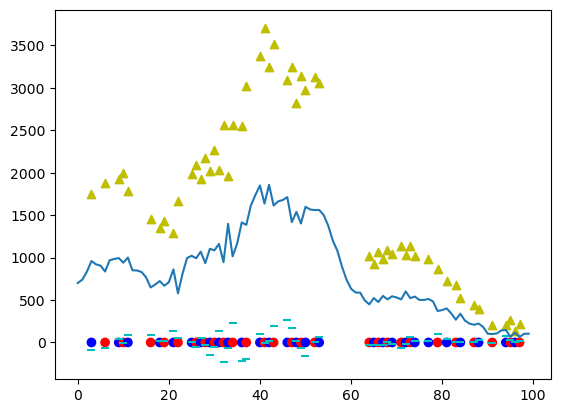

In [3]:
f = open('event1.csv')
events = [e.split(',') for e in f.readline().split(';')[:-1]]
cols = [['r','g','b'][int(e[0]) + 1] for e in events]
times = [int(e[1]) for e in events]
peaks = [int(e[3]) for e in events]
upper = [int(e[2]) + int(e[5]) for e in events]
lower = [int(e[2]) - int(e[5]) for e in events]
f = open('trace.csv')
vals = [int(e) for e in f.readline().split(',')[:-1]]
plt.plot(vals)
plt.scatter(times,peaks,color = cols)
plt.scatter(times,upper,marker='^', color = "y")
plt.scatter(times,lower,marker='_', color = "c")


In [6]:
f = open('event2.csv')
events = [e.split(',') for e in f.readline().split(';')[:-1]]
cols = [['r','g','b'][int(e[0]) + 1] for e in events]
times = [int(e[1]) for e in events]
peaks = [int(e[3]) for e in events]
upper = [int(e[3]) + int(e[5]) for e in events]
lower = [int(e[3]) - int(e[5]) for e in events]
f = open('trace.csv')
vals = [int(e) for e in f.readline().split(',')[:-1]]
plt.plot(vals)
plt.scatter(times,peaks,color = cols)
plt.scatter(times,upper,marker='_', color = "y")
plt.scatter(times,lower,marker='', color = "c")


ValueError: invalid literal for int() with base 10: '86.77173118783175'

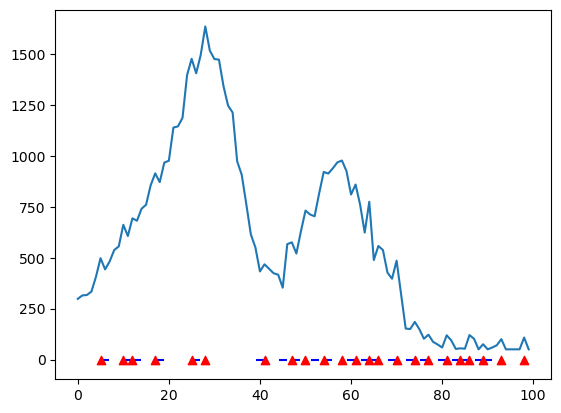

In [14]:
tf = open('trace.csv')
f1 = open('event1.csv')
f2 = open('event2.csv')
f3 = open('event3.csv')
f4 = open('event4.csv')

def plot_graph(f,tf):
    events = [e.split(',') for e in f.readline().split(';')[:-1]]
    traces = [int(e) for e in tf.readline().split(',')[:-1]]
    plt.plot(traces)

    key = "-1"
    times = [int(e[1]) for e in events if e[0] == key]
    values = [int(e[3]) for e in events if e[0] == key]
    plt.scatter(times,values,marker = '_', color = 'b')

    key = "0"
    times = [int(e[1]) for e in events if e[0] == key]
    values = [int(e[3]) for e in events if e[0] == key]
    plt.scatter(times,values,marker = '.', color = 'g')

    key = "1"
    times = [int(e[1]) for e in events if e[0] == key]
    values = [int(e[3]) for e in events if e[0] == key]
    plt.scatter(times,values,marker = '^', color = 'r')

plot_graph(f1,tf)

[['1', '13', '50', '38', '14', '85', '24'], ['0', '14', '85', '24', '15', '50', '24'], ['1', '16', '50', '24', '17', '94', '24'], ['0', '17', '94', '24', '18', '50', '24'], ['1', '19', '74', '24', '20', '113', '27'], ['0', '20', '113', '27', '21', '50', '27'], ['1', '21', '50', '27', '22', '87', '15'], ['0', '22', '87', '15', '23', '50', '15'], ['1', '23', '50', '15', '24', '80', '15'], ['0', '25', '88', '15', '26', '52', '15'], ['1', '26', '52', '15', '27', '108', '15'], ['0', '27', '108', '15', '28', '55', '15'], ['1', '29', '55', '15', '30', '78', '7'], ['0', '30', '78', '7', '31', '57', '7'], ['1', '31', '57', '7', '32', '65', '7']]
[['1', '37', '1', '55', '38', '89', '41'], ['-1', '38', '89', '41', '39', '-71', '41'], ['0', '39', '-71', '41', '40', '20', '41'], ['1', '42', '12', '41', '43', '62', '41'], ['0', '43', '62', '41', '44', '-9', '41'], ['1', '46', '28', '41', '47', '76', '45'], ['-1', '47', '76', '45', '48', '-53', '45'], ['1', '48', '-53', '45', '49', '62', '45'], ['0',

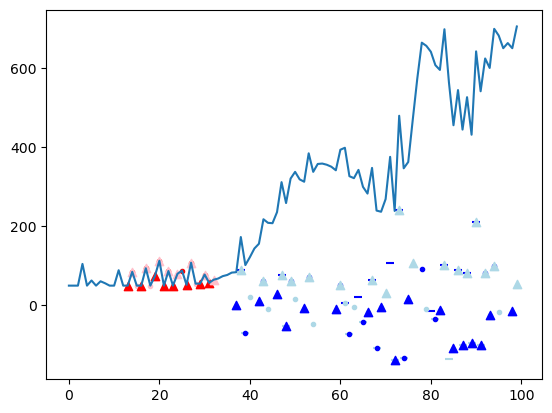

In [29]:
tf = open('trace.csv')
f1 = open('event1.csv')
f2 = open('event2.csv')
f3 = open('event3.csv')
f4 = open('event4.csv')

def plot_fd_graph_key(events,key, marker, col1,col2):
    events = [event[1:] for event in events if int(event[0]) == key]
    start = [e[:3] for e in events]
    end = [e[3:] for e in events]
    times = [int(e[0]) for e in start]
    values = [int(e[1]) for e in start]
    plt.scatter(times,values,marker = marker, color = col1)
    times = [int(e[0]) for e in end]
    values = [int(e[1]) for e in end]
    plt.scatter(times,values,marker = marker, color = col2)

def plot_fd_graph_type(events,type,col1,col2):
    events = [event[1:] for event in events if int(event[0]) == type]
    print(events)

    plot_fd_graph_key(events, -1, "_",col1,col2)
    plot_fd_graph_key(events, 0, ".",col1,col2)
    plot_fd_graph_key(events, 1, "^",col1,col2)

def plot_fd_graph(f,tf):
    events = [e.split(',') for e in f.readline().split(';')[:-1]]
    traces = [int(e) for e in tf.readline().split(',')[:-1]]
    plt.plot(traces)
    plot_fd_graph_type(events,0,'r','pink')
    plot_fd_graph_type(events,1,'b','lightblue')


plot_fd_graph(f4,tf)

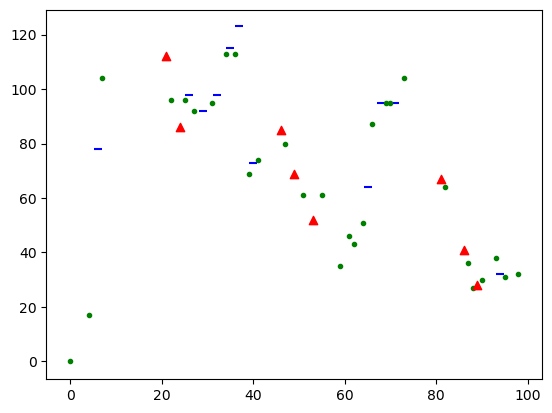

In [12]:
plot_graph(f3,tf)